In [1]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import pandas as pd

df = pd.read_csv('data.csv', encoding = 'CP949')

In [3]:
df.iloc[1,3:]

2013.01 월       4178537.0
2013.02 월       4181574.0
2013.03 월       4182314.0
2013.04 월       4182017.0
2013.05 월       4181819.0
                  ...    
2024.01 월       4471017.0
2024.02 월       4480607.0
2024.03 월       4485819.0
2024.04 월       4486137.0
Unnamed: 139          NaN
Name: 1, Length: 137, dtype: object

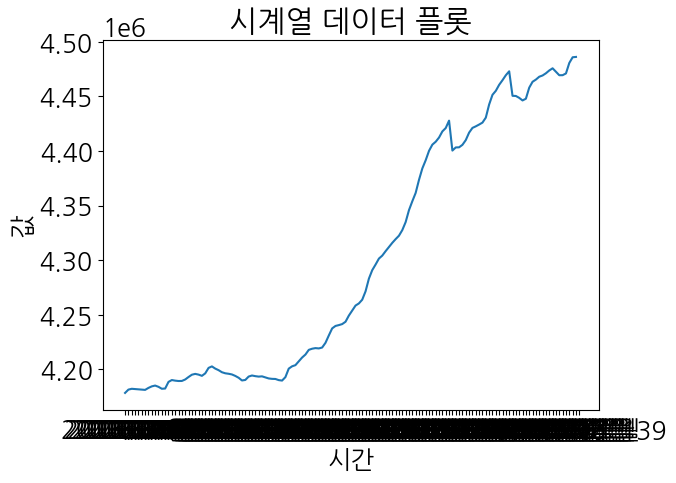

In [4]:
import matplotlib.pyplot as plt

# 시계열 데이터의 인덱스를 x축으로 사용하여 플로팅
plt.plot(df.iloc[1, 3:])
plt.xlabel('시간')
plt.ylabel('값')
plt.title('시계열 데이터 플롯')
plt.show()


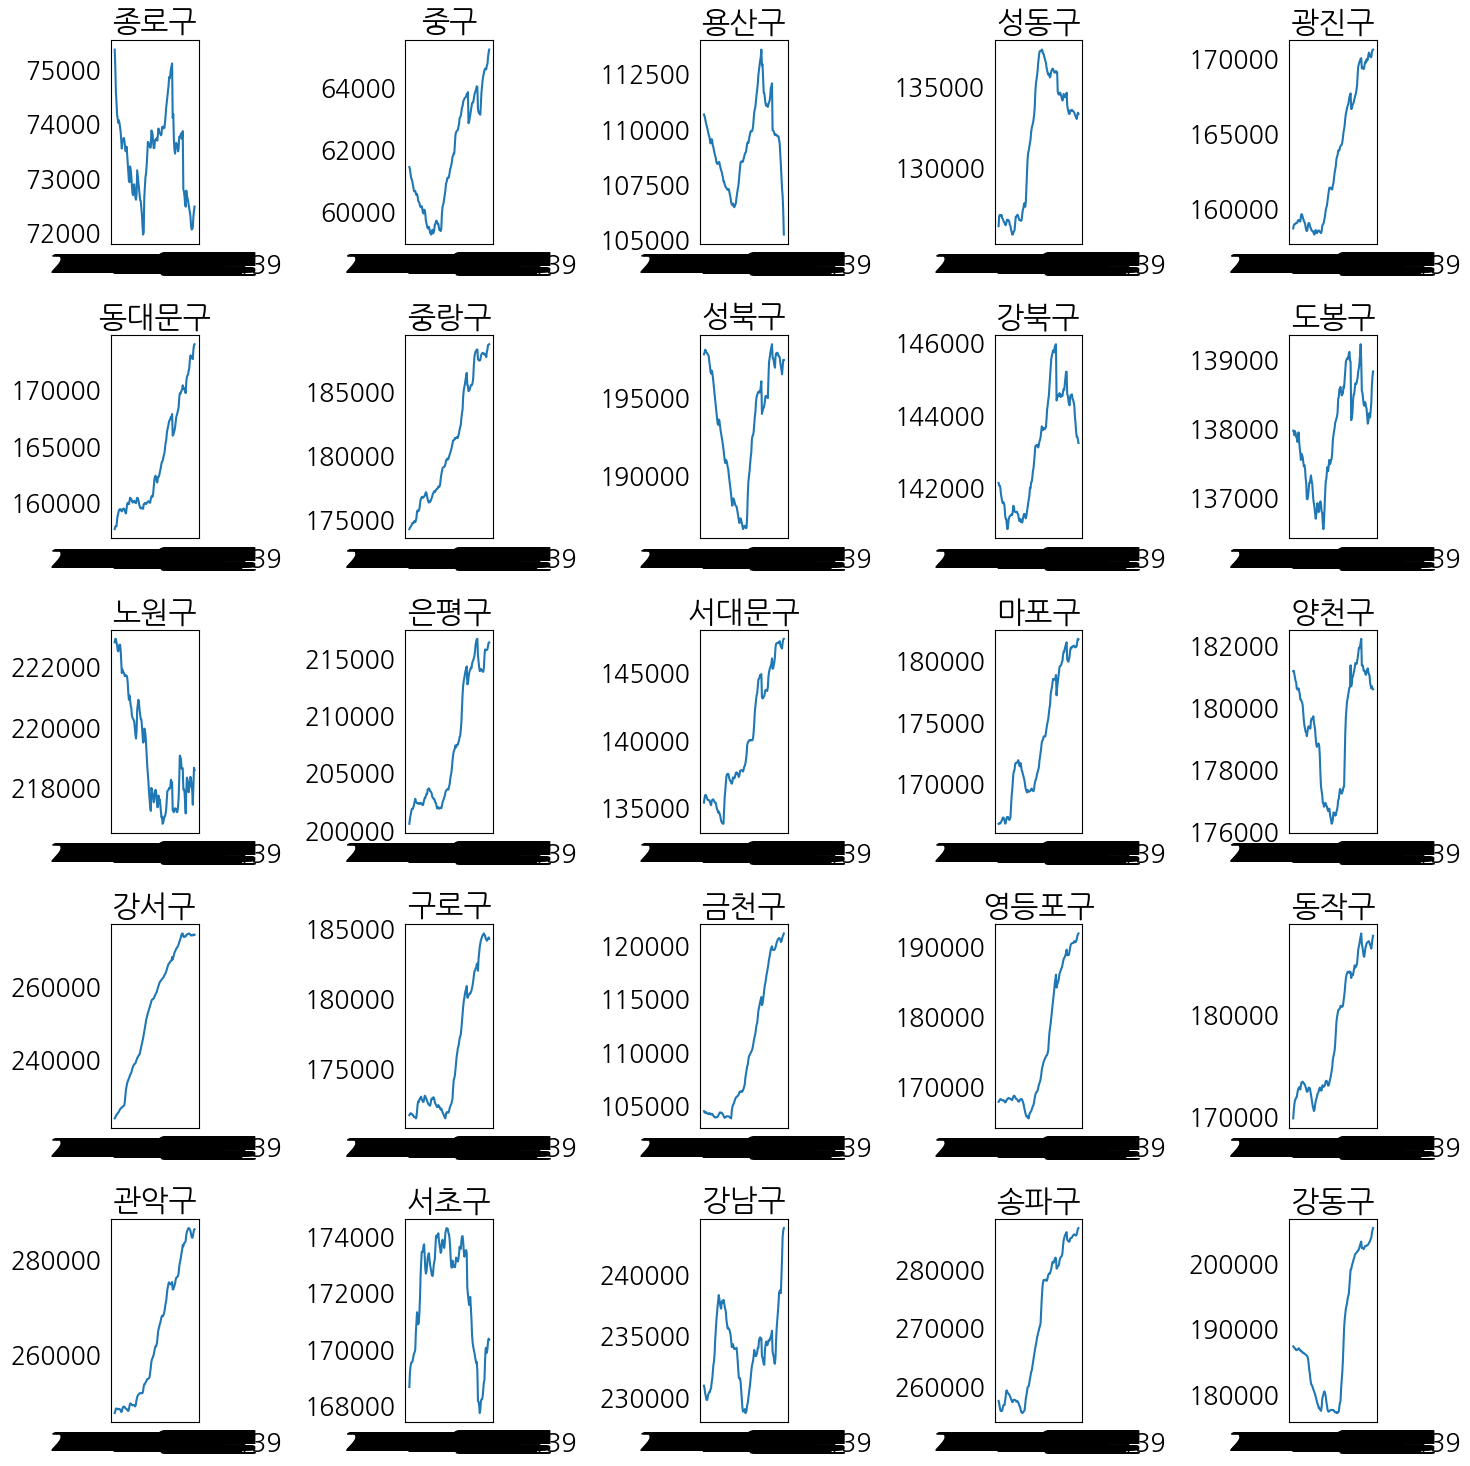

In [7]:
import matplotlib.pyplot as plt

# subplot의 행과 열 개수 설정
num_rows = 5
num_cols = 5

# subplot 생성
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# 각 subplot에 데이터 플로팅
for i in range(2, 27):
    row = (i - 2) // num_cols
    col = (i - 2) % num_cols
    axs[row, col].plot(df.iloc[i, 3:])
    axs[row, col].set_title(df.iloc[i, 0])  # 제목을 df.iloc[i, 0]로 설정
    axs[row, col].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)  # 축 라벨 제거

# 레이아웃 조정
plt.tight_layout()
plt.show()


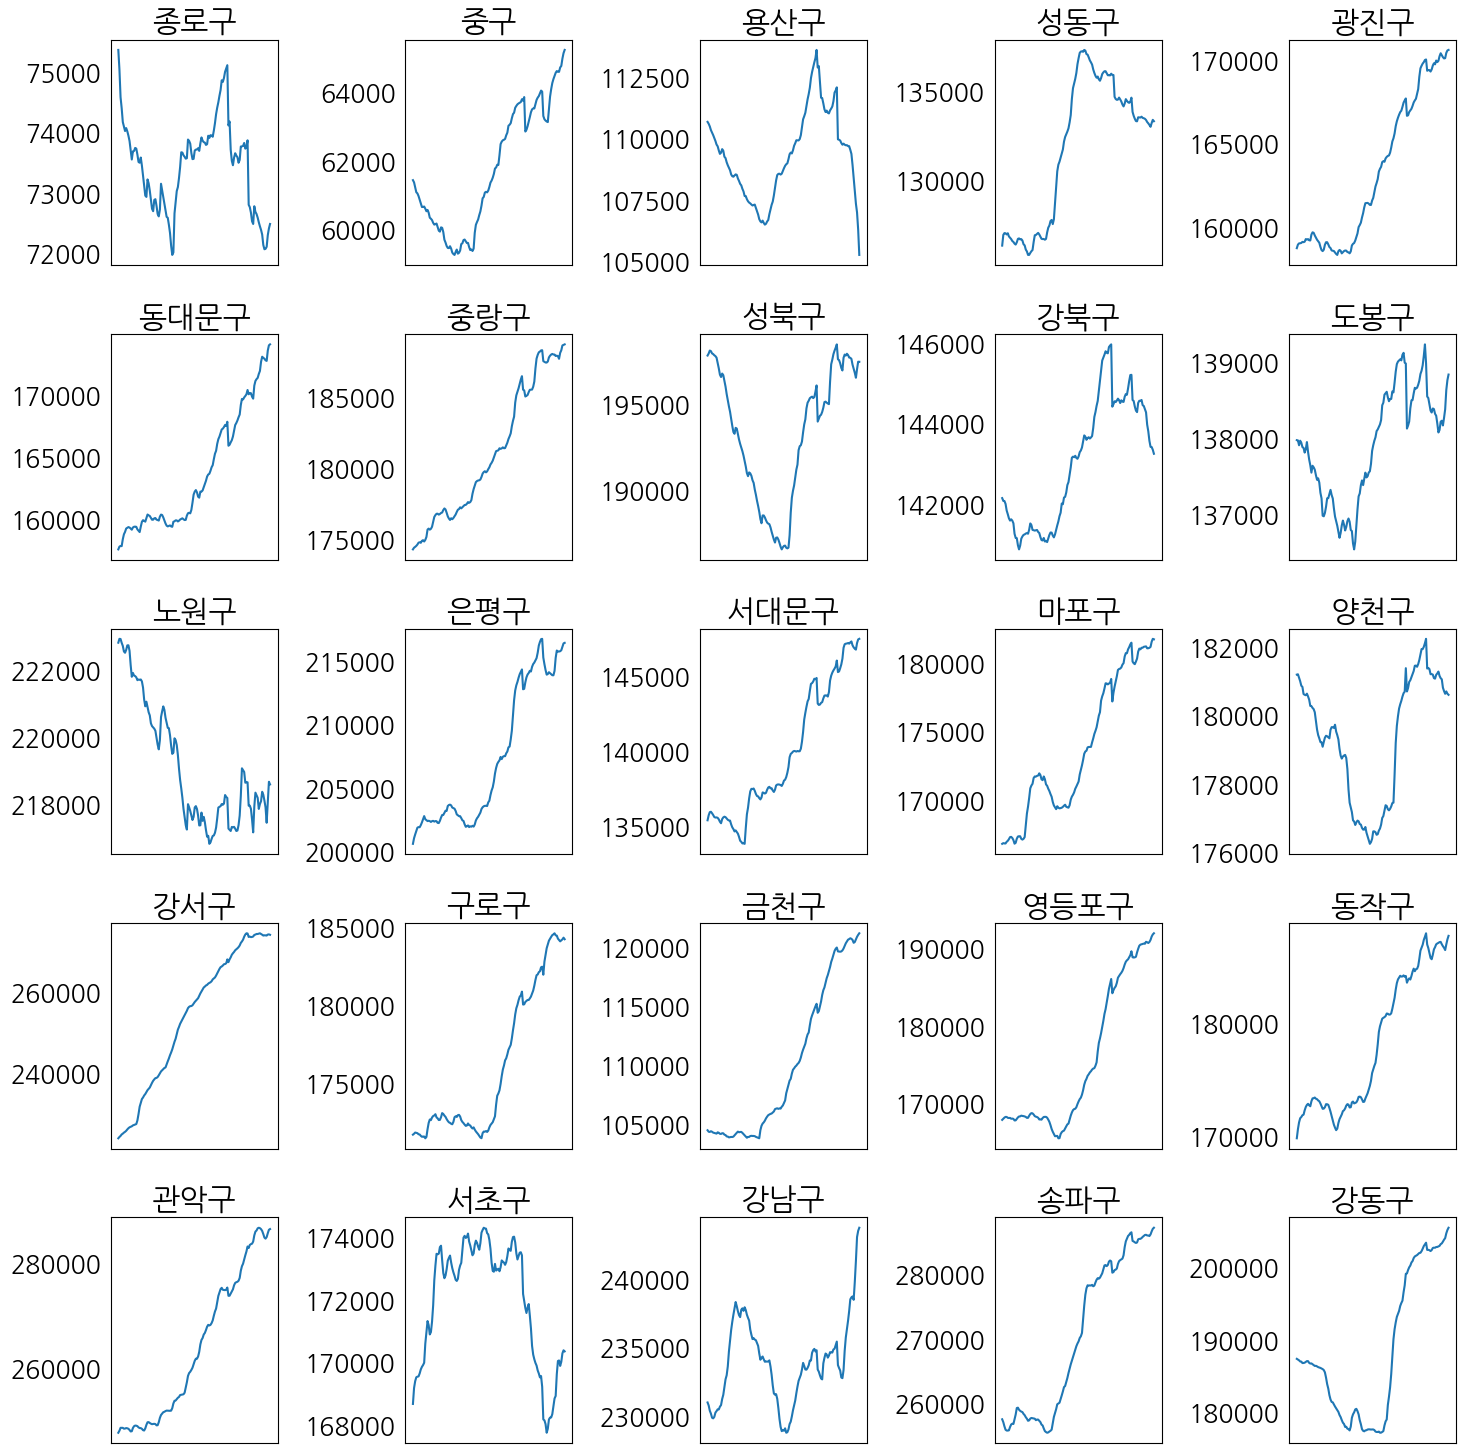

In [15]:
import matplotlib.pyplot as plt

# subplot의 행과 열 개수 설정
num_rows = 5
num_cols = 5

# subplot 생성
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# 데이터프레임에서 플로팅할 데이터 추출
data_to_plot = df.iloc[2:27, 3:]

# 각 subplot에 데이터 플로팅
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j  # 각 subplot에 플로팅할 데이터의 인덱스 계산
        if index < 25:
            axs[i, j].plot(data_to_plot.iloc[index])
            axs[i, j].set_title(df.iloc[index+2, 0])  # 제목을 df.iloc[i+2, 0]로 설정 (첫 번째 행부터 시작이니까)
            axs[i, j].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # x 라벨 제거
            axs[i, j].tick_params(axis='y', which='both', left=False, right=False)  # y 라벨 제거
        else:
            axs[i, j].axis('off')  # 25개보다 적은 데이터는 축을 없앱니다.

# 레이아웃 조정
plt.tight_layout()
plt.show()


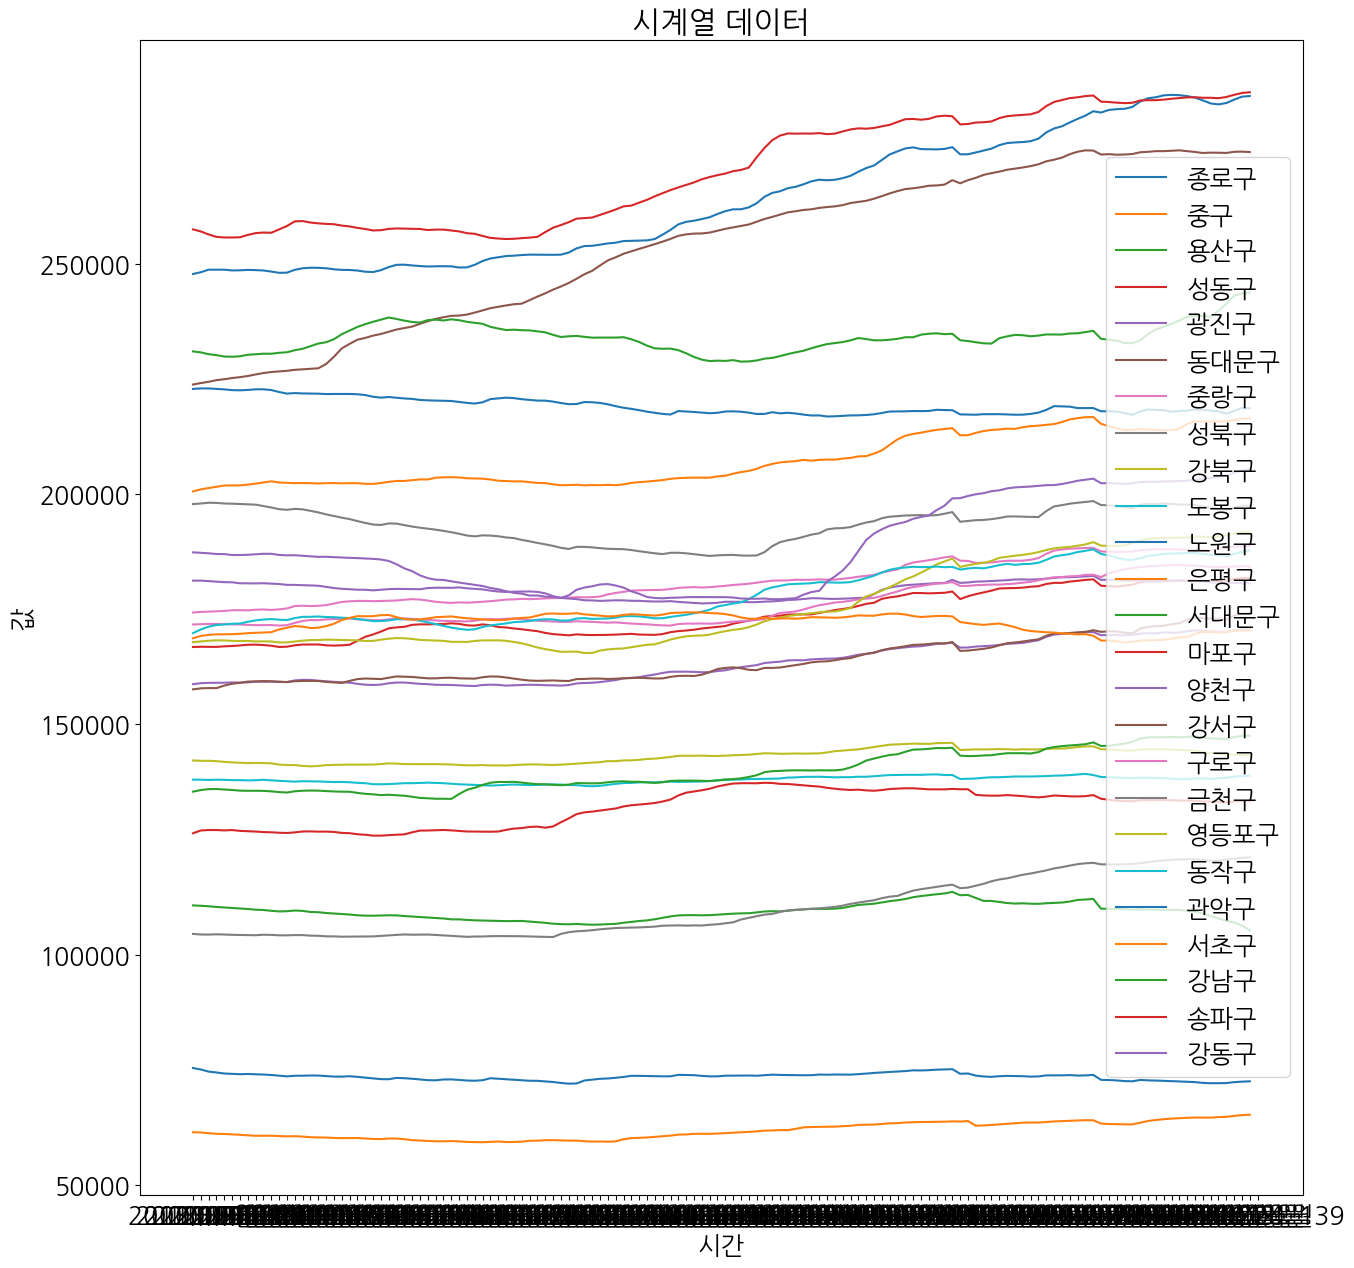

In [9]:
import matplotlib.pyplot as plt

# 데이터프레임의 모든 행과 열에 대한 데이터를 모두 가져옵니다.
# 이를 하나의 subplot에 그려 전체 데이터를 표시합니다.
plt.figure(figsize=(15, 15))
for i in range(2, 27):
    plt.plot(df.iloc[i, 3:], label=df.iloc[i, 0])  # 각 plot의 label로 df.iloc[i, 0]을 사용합니다.

plt.xlabel('시간')
plt.ylabel('값')
plt.title('시계열 데이터')
plt.legend()  # 각 plot의 label을 범례로 표시합니다.
plt.show()


In [17]:
!pip install statsmodels

     ---------------------------------------- 9.8/9.8 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 4.8 MB/s eta 0:00:00


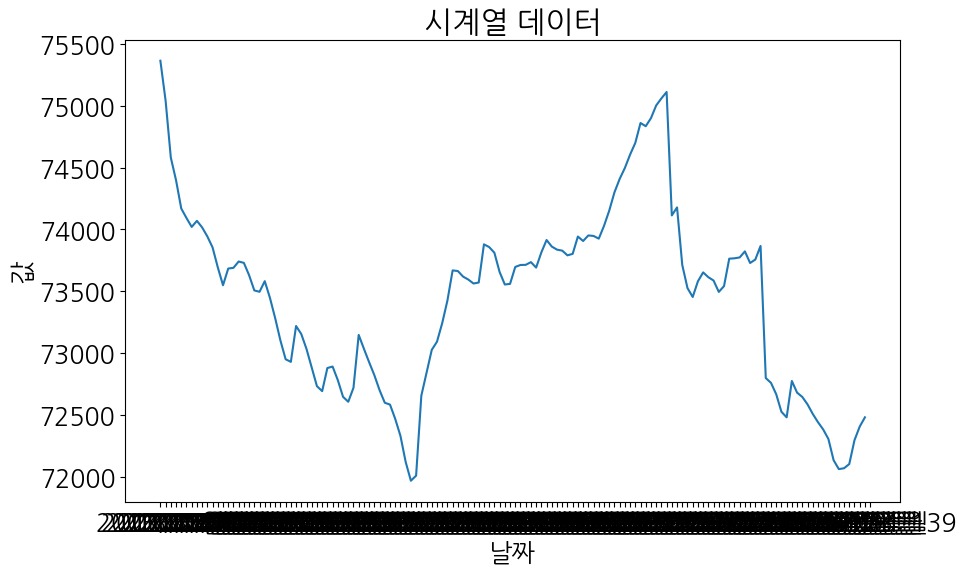

ADF 테스트 결과:
ADF 통계량: nan
p-value: nan
Critical Values:
   1%: -3.4793722137854926
   5%: -2.8830370378332995
   10%: -2.578233635380623
p-value가 0.05 이상이므로 시계열 데이터는 비정상 시계열로 간주됩니다.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 시계열 데이터 생성 (임의로 생성)
data = df.iloc[2,3:]

# ADF 테스트 함수 정의
def adf_test(timeseries):
    # ADF 테스트 수행
    result = adfuller(timeseries, autolag='AIC')
    
    # 결과 출력
    print('ADF 테스트 결과:')
    print(f'ADF 통계량: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    # 결과 해석
    if result[1] <= 0.05:
        print("p-value가 0.05 이하이므로 시계열 데이터는 정상 시계열로 간주됩니다.")
    else:
        print("p-value가 0.05 이상이므로 시계열 데이터는 비정상 시계열로 간주됩니다.")

# 시계열 그래프 출력
def plot_timeseries(data):
    plt.figure(figsize=(10,6))
    plt.plot(data)
    plt.title('시계열 데이터')
    plt.xlabel('날짜')
    plt.ylabel('값')
    plt.show()

# 시계열 그래프 출력
plot_timeseries(data)

# ADF 테스트 수행
adf_test(data)


In [21]:
import pandas as pd

# 주어진 데이터프레임 df
# df = ...

# data 선택 (2번째 행의 4번째 열부터 끝까지)
data = df.iloc[2, 3:]

# 벡터 차분
diff_data = data.diff().dropna()

# 결과 출력
print(diff_data)


2013.02 월   -323.0
2013.03 월   -461.0
2013.04 월   -183.0
2013.05 월   -229.0
2013.06 월    -77.0
             ...  
2023.12 월      7.0
2024.01 월     34.0
2024.02 월    193.0
2024.03 월    110.0
2024.04 월     75.0
Name: 2, Length: 135, dtype: object


In [22]:
adf_test(diff_data)

ADF 테스트 결과:
ADF 통계량: -9.702839717038835
p-value: 1.0608759004715064e-16
Critical Values:
   1%: -3.480118600110386
   5%: -2.8833618426136196
   10%: -2.578407034974382
p-value가 0.05 이하이므로 시계열 데이터는 정상 시계열로 간주됩니다.
